In [24]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
benchmark_df = pd.read_json("test2code_long_context.jsonl", lines=True)
benchmark_df = benchmark_df[["benchmark_name", "size"]]
benchmark_df.head()

,benchmark_name,size
0,Test2Code_Long_Context_0,3638
1,Test2Code_Long_Context_1,3873
2,Test2Code_Long_Context_2,3703
3,Test2Code_Long_Context_3,5046
4,Test2Code_Long_Context_4,2968


In [21]:
executions_df = pd.read_json("executions.jsonl", lines=True)
executions_df.head()

,benchmark_name,executions
0,Test2Code_Long_Context_0,[{'program': ' def closest_integer(value): ...
1,Test2Code_Long_Context_1,"[{'program': ' def add_elements(arr, k): f..."
2,Test2Code_Long_Context_2,"[{'program': ' def is_nested(string): """""" ..."
3,Test2Code_Long_Context_3,"[{'program': ' def simplify(x, n): """""" ..."
4,Test2Code_Long_Context_4,"[{'program': ' def cycpattern_check(a , b): ..."


In [22]:
def pass1(executions):
    n = len(executions)
    if n == 0:
        return 0
    c = sum(1 for exec in executions if exec["exit_code"] == 0)
    return c / n

combined_df = pd.merge(benchmark_df, executions_df, on="benchmark_name")
combined_df["pass1"] = executions_df["executions"].apply(pass1)
combined_df = combined_df[["benchmark_name", "size", "pass1"]]
combined_df.head()

,benchmark_name,size,pass1
0,Test2Code_Long_Context_0,3638,0.0
1,Test2Code_Long_Context_1,3873,0.0
2,Test2Code_Long_Context_2,3703,0.0
3,Test2Code_Long_Context_3,5046,0.0
4,Test2Code_Long_Context_4,2968,0.0


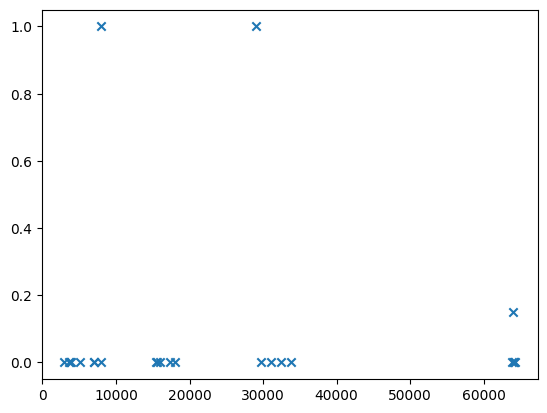

In [27]:
# Plot size on X and pass1 on Y but as a CDF
plt.scatter(combined_df["size"], combined_df["pass1"], marker = "x")

In [29]:
combined_df["pass1"].describe()

count    24.000000
mean      0.089583
std       0.282065
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: pass1, dtype: float64